<a href="https://colab.research.google.com/github/riaddajani/Cogsci/blob/main/H%26H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as mp
from math import exp as exp
import numpy as np

#Variables
deltaT = 0.01
maxT = 450
start = 50
stop = 300
c = 1
v0 = 0
I = 0
thrshld = 3

#Membrane conductances
ena = 115
gna = 120
ek = -12
gk = 36
el = 10.6
gl = 0.30

In [2]:
def c_volt(V, curr, m, n, h):
	'''dV/dt'''
	return curr-((gna*(m**3)*h*(V-ena))
				+(gk*(n**4)*(V-ek))
				+(gl*(V-el)))

def update(old, deltaT, roc):
	'''Euler's Method'''
	return roc * deltaT + old

def between(start, stop, time):
	'''Activation window'''
	if start < time < stop:
		return True
	elif start < time > stop:
		return False

#Helper alpha/beta functions
def alphaN(volt):
	return (0.01*(10-volt))/(exp((10-volt)/10)-1)

def alphaM(volt):
	return (0.1*(25-volt))/(exp((25-volt)/10)-1)

def alphaH(volt):
	return 0.07*exp(-volt/20)

def betaN(volt):
	return 0.125*exp(-volt/80)

def betaM(volt):
	return 4*exp(-volt/18)

def betaH(volt):
	return 1/(exp((30-volt)/10)+1)

#K, Na & Leak channel probability and dot products
def Ndot(alpha, beta, volt, n):
	return (alpha)*(1-n)-((beta)*n)

def Mdot(alpha, beta, volt, m):
	return (alpha)*(1-m)-((beta)*m)

def Hdot(alpha, beta, volt, h):
	return (alpha)*(1-h)-((beta)*h)

def Ninf(alpha, beta, volt):
	return (alpha)/((alpha)+(beta))

def Minf(alpha, beta, volt):
	return (alpha)/((alpha)+(beta))

def Hinf(alpha, beta, volt):
	return (alpha)/((alpha)+(beta))

In [3]:
#Simulate HandH
def fire(initvolt):
	'''INITIALIZE'''
	time = [0]
	vs = [initvolt]
	currents = [0]
	nA = alphaN(vs[-1])
	mA = alphaM(vs[-1])
	hA = alphaH(vs[-1])
	nB = betaN(vs[-1])
	mB = betaM(vs[-1])
	hB = betaH(vs[-1])
	ns = [Ninf(nA, nB, vs[-1])]
	ms = [Minf(mA, mB, vs[-1])]
	hs = [Hinf(hA, hB, vs[-1])]

	'''SIMULATE'''
	while time[-1] < maxT:
		I = 0
		noise = np.random.normal(-1,1,stop-start)
		if between(start, stop, time[-1]) == True:
			I = 20 + noise[-1]
			dv = c_volt(vs[-1], I, ms[-1], ns[-1], hs[-1])
			now_volt = update(vs[-1], deltaT, dv)
		else:
			dv = c_volt(vs[-1], I, ms[-1], ns[-1], hs[-1])
			now_volt = update(vs[-1], deltaT, dv)
		nA = alphaN(vs[-1])
		mA = alphaM(vs[-1])
		hA = alphaH(vs[-1])
		nB = betaN(vs[-1])
		mB = betaM(vs[-1])
		hB = betaH(vs[-1])
		ndot = Ndot(nA, nB, vs[-1], ns[-1])
		mdot = Mdot(mA, mB, vs[-1], ms[-1])
		hdot = Hdot(hA, hB, vs[-1], hs[-1])
		ns.append(update(ns[-1], deltaT, ndot))
		ms.append(update(ms[-1], deltaT, mdot))
		hs.append(update(hs[-1], deltaT, hdot))
		vs.append(now_volt)
		currents.append(I)
		time[-1] += deltaT
		time.append(time[-1])
	return vs, time, currents

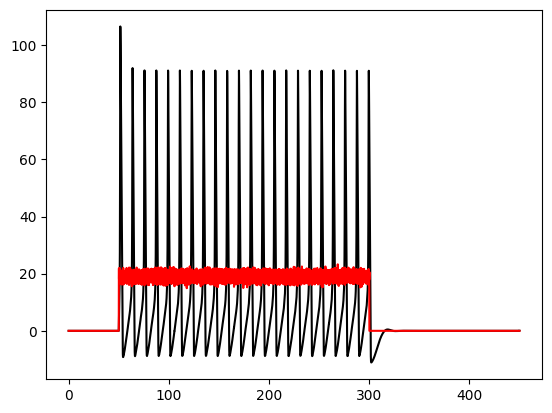

In [4]:
vs, time, currents = fire(v0)
time[0] = 0
currents[0] = 0
mp.plot(time, vs, 'black')
mp.plot(time, currents, 'r')
mp.show()